DTW Intution
=========
The purpose of this notebook is to try to display some fiducial DTW conditions to give folks a sense of how it works.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.rc('font', family='serif', size=11)
mpl.rc('savefig', bbox='tight')

In [2]:
import dtw

In [3]:
def run_dtw(t, x, y, xname=None, yname=None, offset=0, vmax=None):
    dist, cost, path = dtw.dtw(x[:,np.newaxis], y[:,np.newaxis])
    fig = plt.figure(figsize=(16, 6))
    plt.subplot(121)
    plt.plot(t, x, c='purple', label='x')
    plt.plot(t, y, c='green', label='y')
    plt.legend(loc=0)
    plt.xlabel('time')
    plt.ylabel('value')
    plt.subplot(122)
    cost1 = cost[1:, 1:]
    offset = t[0]
    extent = (offset, offset+cost1.shape[1], offset, offset+cost1.shape[0])
    plt.imshow(cost1[::-1], cmap='viridis', extent=extent, vmin=0.0, vmax=vmax)
    w = offset + path
    plt.plot(w[1], w[0], 'w-')
    plt.axis(extent)
    plt.xticks(np.asarray(np.linspace(extent[0], extent[1], 5), int))
    plt.yticks(np.asarray(np.linspace(extent[2], extent[3], 5), int))
    cb = plt.colorbar()
    cb.set_label('Cost', rotation=-90, va='bottom')
    plt.xlabel('x')
    plt.ylabel('y')
    #fname = 'cost-{0}-to-{1}'.format(make_fname_safe(xname), make_fname_safe(yname))
    #plt.savefig(fname + '.png')
    #plt.savefig(fname + '.eps')
    print('Warping between {0} and {1}:'.format(xname, yname))
    print('  Distance is ', dist)

Same Curves
=======
The same data should always return $d = 0.0$

Warping between None and None:
  Distance is  8.56354102624e-319


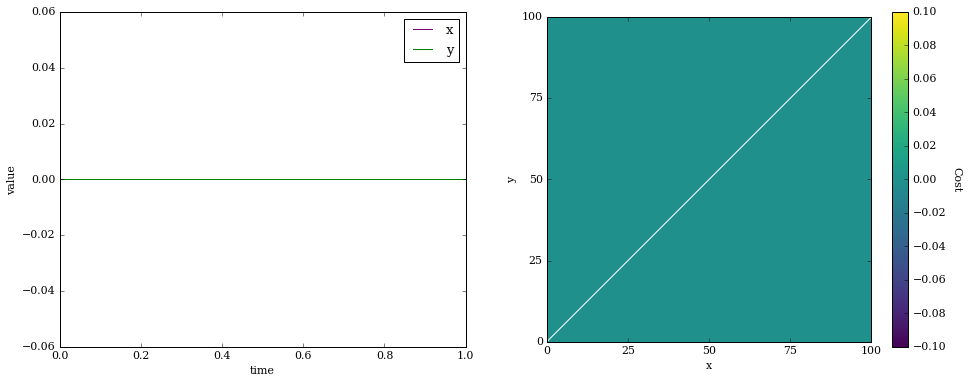

In [4]:
t = np.linspace(0, 1, 101)
x = y = np.zeros(len(t))
run_dtw(t, x, y)

Warping between None and None:
  Distance is  3.41829574542e-312


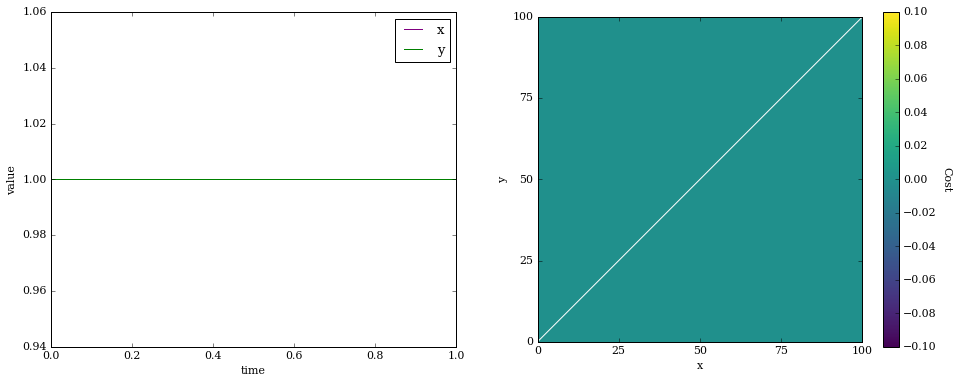

In [5]:
x = y = np.ones(len(t))
run_dtw(t, x, y)

Warping between None and None:
  Distance is  3.41829574543e-312


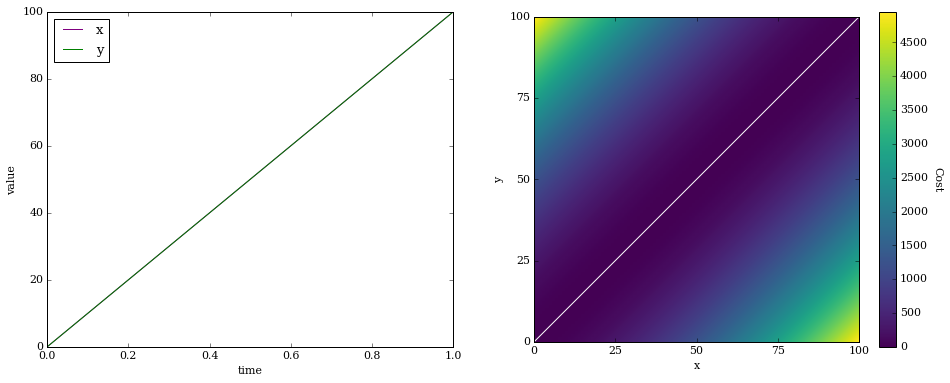

In [6]:
x = y = np.arange(len(t))
run_dtw(t, x, y)

Warping between None and None:
  Distance is  1.07386650321e-318


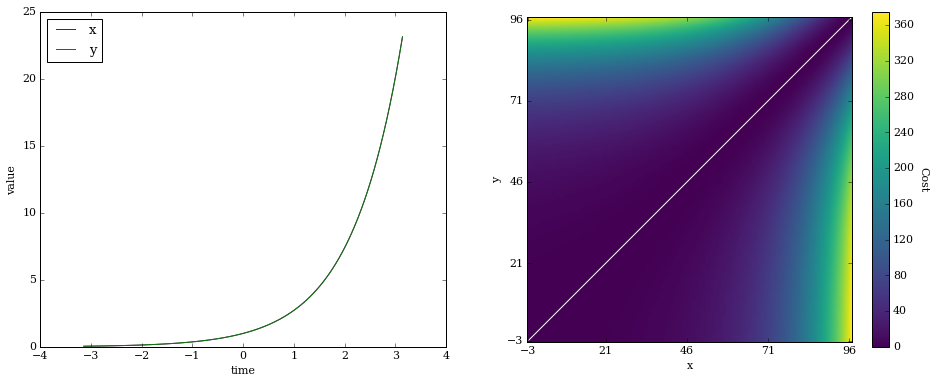

In [7]:
t = np.linspace(-np.pi, np.pi, 101)
x = y = np.exp(t)
run_dtw(t, x, y)

Warping between None and None:
  Distance is  3.41829574542e-312


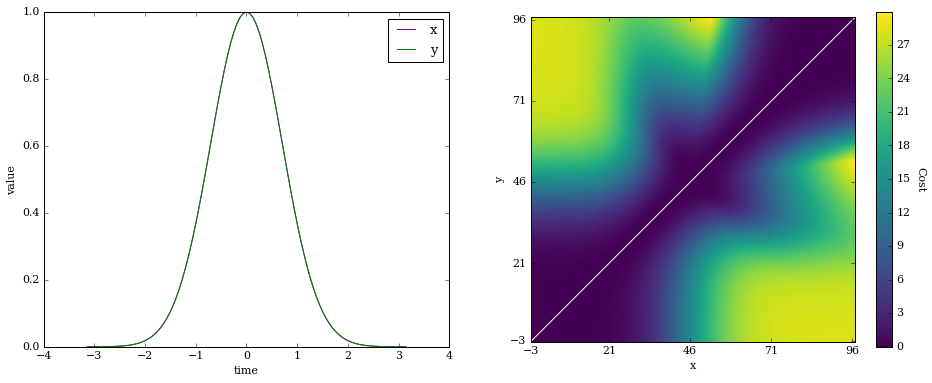

In [8]:
t = np.linspace(-np.pi, np.pi, 101)
x = y = np.exp(-t**2)
run_dtw(t, x, y)

Constant Y Offset
===========

Warping between None and None:
  Distance is  0.5


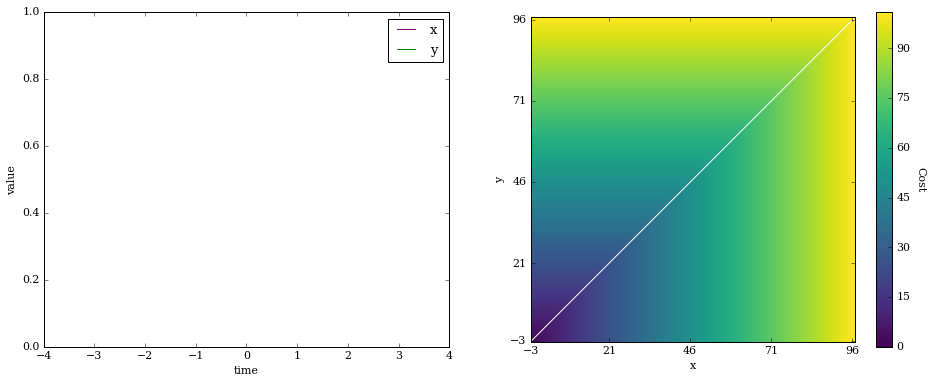

In [9]:
x = np.zeros(len(t))
y = x + 1
run_dtw(t, x, y)

Warping between None and None:
  Distance is  21.0


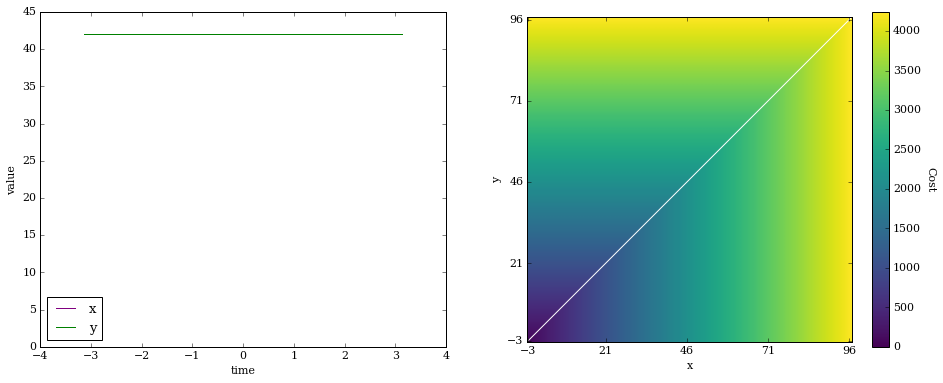

In [10]:
y = x + 42
run_dtw(t, x, y)

Warping between None and None:
  Distance is  0.365418159316


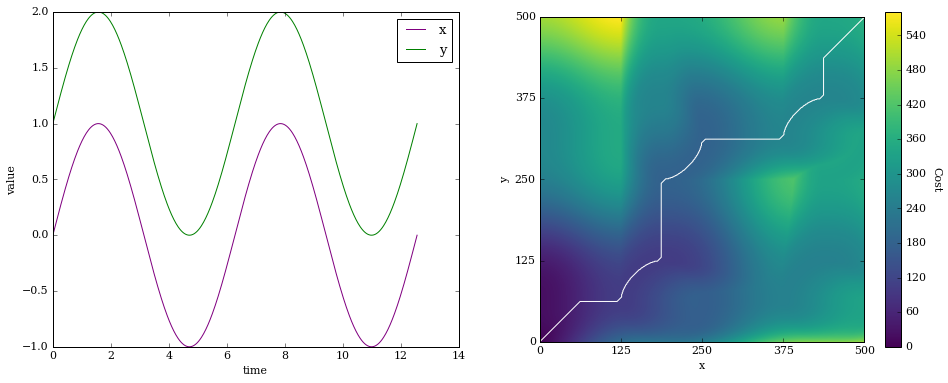

In [11]:
t = np.linspace(0, 4*np.pi, 501)
x = np.sin(t)
y = x + 1
run_dtw(t, x, y)

Warping between None and None:
  Distance is  1.0


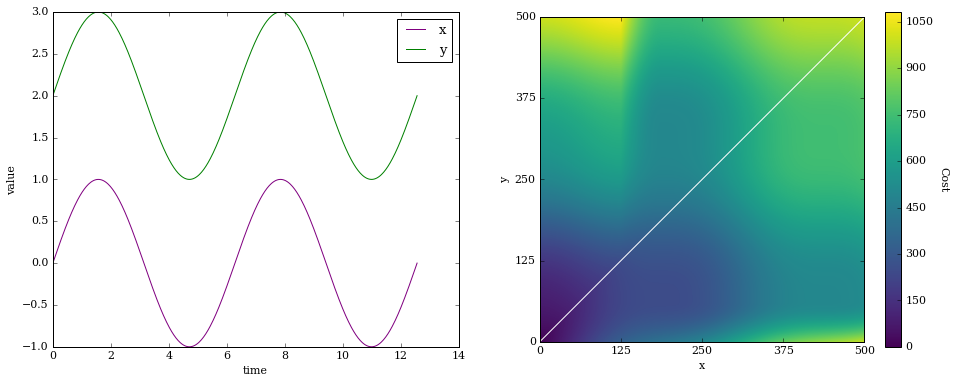

In [12]:
t = np.linspace(0, 4*np.pi, 501)
x = np.sin(t)
y = x + 2
run_dtw(t, x, y)

Warping between None and None:
  Distance is  3.78157361384


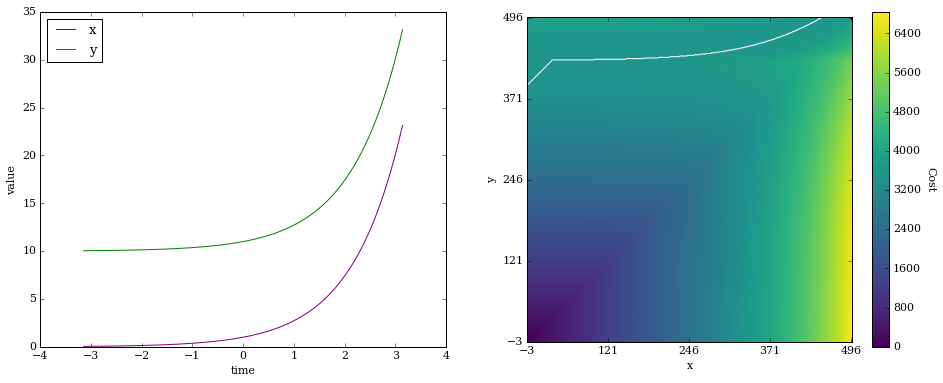

In [13]:
t = np.linspace(-np.pi, np.pi, 501)
x = np.exp(t)
y = x + 10
run_dtw(t, x, y)

Warping between None and None:
  Distance is  0.192557367203


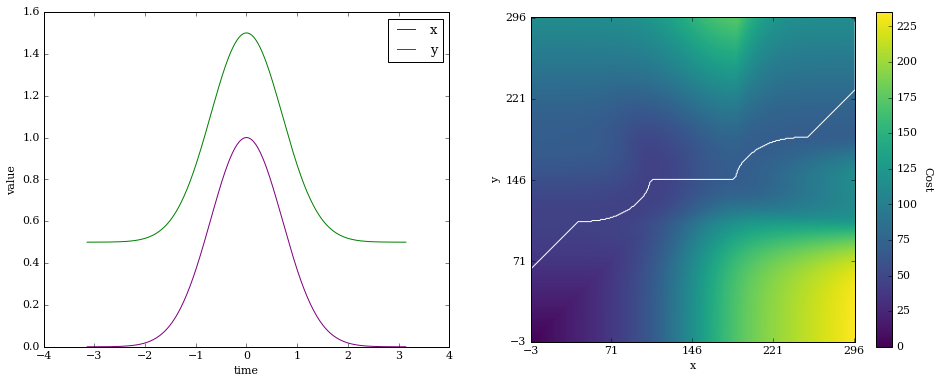

In [14]:
t = np.linspace(-np.pi, np.pi, 301)
x = np.exp(-t**2)
y = x + 0.5
run_dtw(t, x, y)

Warping between None and None:
  Distance is  0.5


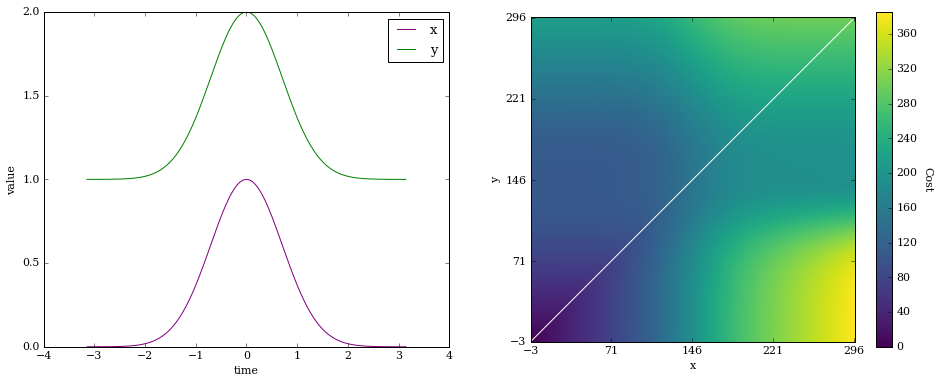

In [15]:
t = np.linspace(-np.pi, np.pi, 301)
x = np.exp(-t**2)
y = x + 1.0
run_dtw(t, x, y)

Constant X Offset
==========

Warping between None and None:
  Distance is  12.6237623762


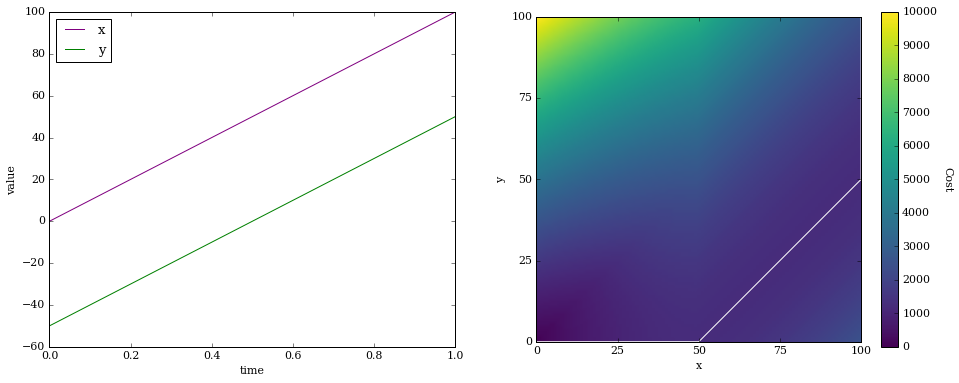

In [16]:
t = np.linspace(0, 1.0, 101)
x = np.arange(len(t))
y = np.arange(len(t)) - 50
run_dtw(t, x, y)

Warping between None and None:
  Distance is  0.0652375270784


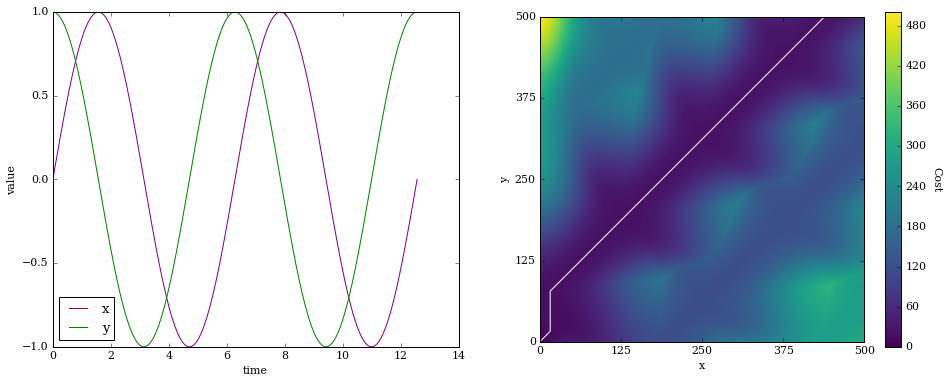

In [17]:
t = np.linspace(0, 4*np.pi, 501)
x = np.sin(t)
y = np.cos(t)
run_dtw(t, x, y)

Warping between None and None:
  Distance is  0.158828907608


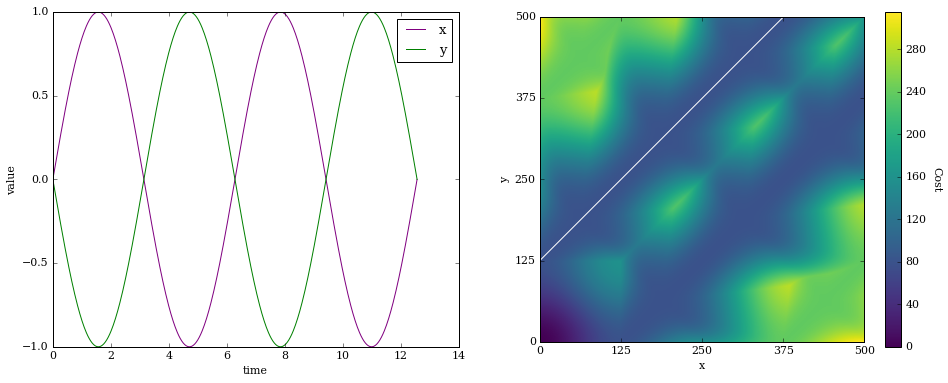

In [18]:
t = np.linspace(0, 4*np.pi, 501)
x = np.sin(t)
y = np.sin(t+np.pi)
run_dtw(t, x, y)

Warping between None and None:
  Distance is  1.42283879487


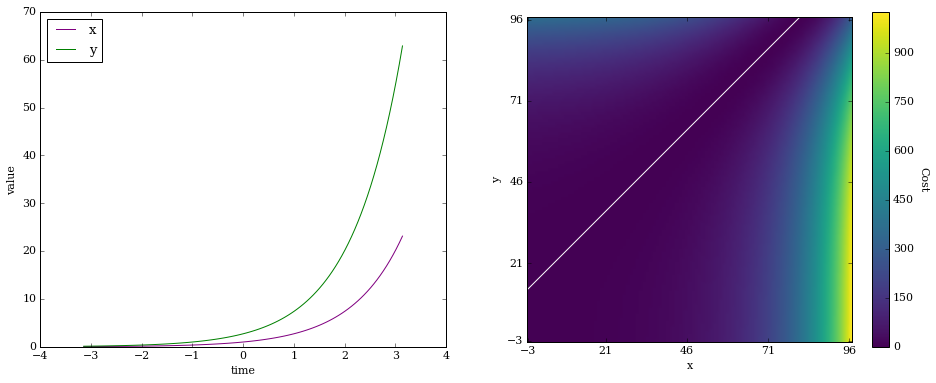

In [19]:
t = np.linspace(-np.pi, np.pi, 101)
x = np.exp(t)
y = np.exp(t+1)
run_dtw(t, x, y)

Warping between None and None:
  Distance is  0.00148612965033


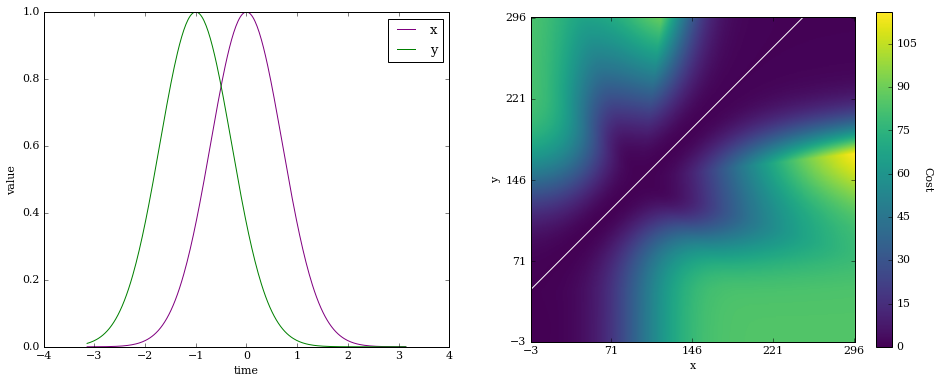

In [20]:
t = np.linspace(-np.pi, np.pi, 301)
x = np.exp(-t**2)
y = np.exp(-(t+1.0)**2)
run_dtw(t, x, y)

Amplitude Adjustment
=============

Warping between None and None:
  Distance is  0.223083557253


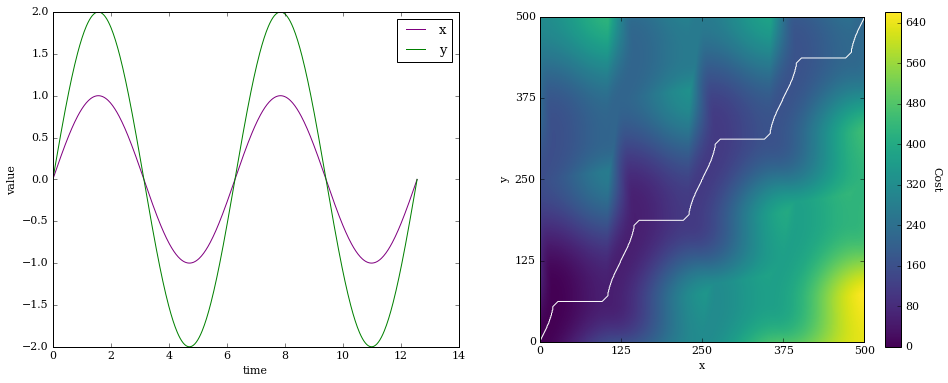

In [21]:
t = np.linspace(0, 4*np.pi, 501)
x = np.sin(t)
y = 2*np.sin(t)
run_dtw(t, x, y)

Warping between None and None:
  Distance is  0.0833418855688


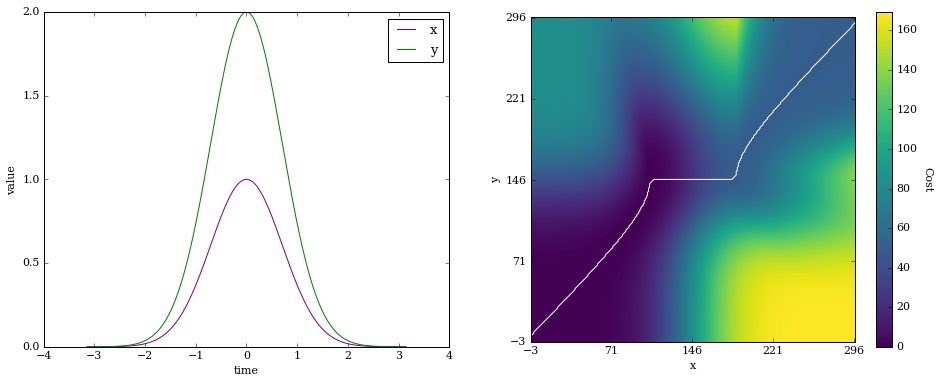

In [22]:
t = np.linspace(-np.pi, np.pi, 301)
x = np.exp(-t**2)
y = 2.0*np.exp(-t**2)
run_dtw(t, x, y)